In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import tensorflow as tf
from sklearn.model_selection import train_test_split
import keras
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/overlord/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
dataset = pd.read_csv(r'./data/humor-ai-data.csv')

In [3]:
dataset.head()

,body,rating,id
0,A man visits the doctor. The doctor says 'I ha...,3,6ff2eb3d-dd87-472d-8b37-bbf4e83467d8
1,This couple had an excellent relationship goin...,3,fe20afca-8bb7-4dea-8cdd-7b851159ae75
2,What's 200 feet long and has 4 teeth? The fro...,3,4c701272-c049-49c2-ba63-882d8216da13
3,What's the difference between a man and a toi...,3,dfbf5803-a47a-4853-82b2-1a21ca4eb285
4,"What's O. J. Simpson's Internet address?Slash,...",3,61f0d09b-af1e-4591-9eb2-f8720750cb4c


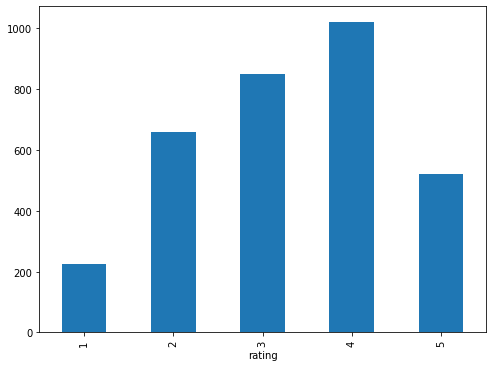

In [4]:

fig = plt.figure(figsize=(8,6))
dataset.groupby('rating').body.count().plot.bar()
plt.show()

In [1]:
# TODO: save new ratings as a new column
def tranform_rating(rating):
    if rating == 1:
        return "terrible"
    elif rating == 2:
        return "not good"
    elif rating == 3:
        return "ok"
    elif rating == 4:
        return "funny"
    elif rating == 5:
        return "very funny"


In [6]:
dataset['rating'] = dataset['rating'].apply(tranform_rating)

In [7]:
dataset.head()

,body,rating,id
0,A man visits the doctor. The doctor says 'I ha...,ok,6ff2eb3d-dd87-472d-8b37-bbf4e83467d8
1,This couple had an excellent relationship goin...,ok,fe20afca-8bb7-4dea-8cdd-7b851159ae75
2,What's 200 feet long and has 4 teeth? The fro...,ok,4c701272-c049-49c2-ba63-882d8216da13
3,What's the difference between a man and a toi...,ok,dfbf5803-a47a-4853-82b2-1a21ca4eb285
4,"What's O. J. Simpson's Internet address?Slash,...",ok,61f0d09b-af1e-4591-9eb2-f8720750cb4c


In [52]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)
    text = text.replace('x', '')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text
    
dataset['body'] = dataset['body'].apply(clean_text)
dataset['body'] = dataset['body'].str.replace('\d+', '')


<ipython-input-52-271d9abdf1af>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['body'] = dataset['body'].str.replace('\d+', '')


In [53]:
dataset.head()

,body,rating,id
0,man visits doctor doctor says bad news youyou ...,ok,6ff2eb3d-dd87-472d-8b37-bbf4e83467d8
1,couple ecellent relationship going one day cam...,ok,fe20afca-8bb7-4dea-8cdd-7b851159ae75
2,whats feet long teeth front row willie nelson ...,ok,4c701272-c049-49c2-ba63-882d8216da13
3,whats difference man toilet toilet doesnt foll...,ok,dfbf5803-a47a-4853-82b2-1a21ca4eb285
4,whats j simpsons internet addressslash slash b...,ok,61f0d09b-af1e-4591-9eb2-f8720750cb4c


In [57]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(dataset['body'])
sequences = tokenizer.texts_to_sequences(dataset['body'])
one_hot_results = tokenizer.texts_to_matrix(dataset['body'], mode='binary')

word_index = tokenizer.word_index
print('Found {} unique tokens.'.format(len(word_index)))

Found 26994 unique tokens.


In [55]:
sequences[0]

[2, 2400, 44, 44, 4, 145, 183, 3252, 6149, 2, 46, 13, 548, 59, 10, 3252]

In [56]:
one_hot_results[0]

array([0., 0., 1., ..., 0., 0., 0.])

In [ ]:
# Skip one hot encoding
# Add word embeddings
# Hyperparam=MAX_LENGTH. Calc median length, set it as max
# Notebook 7.1 - inspiration for generation. Translate into word-by-word generation
# Hyperparam=TEMP. Test in practise. From 1.0